# **OpenAI SDK for Python Samples**

OpenAI Python SDK has two versions on the market, based on version 0.28.1 or 1.x, mainly for API access of different OpenAI models. Although many related SDKs are still on 0.28.1, as time goes by, 1.x SDKs have been gradually integrated into related content. Therefore, it is recommended that all beginners use the latest OpenAI SDK 

In [1]:
! pip install openai -U
! pip install python-dotenv -U
! pip install pillow -U

  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 1.0.0
    Uninstalling python-dotenv-1.0.0:
      Successfully uninstalled python-dotenv-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
semantic-kernel 0.5.1.dev0 requires python-dotenv==1.0.0, but you have python-dotenv 1.0.1 which is incompatible.


#### *import Azure OpenAI from OpenAI SDK*

In [2]:
import os
import dotenv
from openai import AzureOpenAI



In [3]:
dotenv.load_dotenv()

True

In [4]:
aoai_endpoint = os.environ['AZURE_OPENAI_ENDPOINT']
aoai_key = os.environ['AZURE_OPENAI_API_KEY']   
aoai_version = os.environ['AZURE_OPENAI_VERSION']  

### *init AzureOpenAI*

You need to get Azure OpenAI Service API Key and Endpoint in your azure portal

In [5]:
client = AzureOpenAI(
  azure_endpoint = aoai_endpoint, 
  api_key = aoai_key,  
  api_version = aoai_version
)

## **Text Completion**

Text completion is the most classic OpenAI feature. You can do text generation through it. In OpenAI, we initially used the GPT-3 davinci model for text completion. Now we use gpt-3.5-turbo-instruct to implement text completion.

OpenAI's text generation models (often called generative pre-trained transformers or large language models) have been trained to understand natural language, code, and images. The models provide text outputs in response to their inputs. The inputs to these models are also referred to as "prompts". Designing a prompt is essentially how you “program” a large language model model, usually by providing instructions or some examples of how to successfully complete a task.

Using OpenAI's text generation models, you can build applications to:

- Draft documents

- Write computer code

- Answer questions about a knowledge base

- Analyze texts

- Give software a natural language interface

- Tutor in a range of subjects

- Translate languages

- Simulate characters for games

In [6]:
response = client.completions.create(model='Your Azure OpenAI Service gpt-35-turbo-instruct Model Delployment Name' , prompt="How to learn AI", max_tokens=1000)

In [7]:
response.choices[0].text

'\n1. Start with the basics: Before diving into advanced concepts, it is important to have a strong foundation in mathematics and programming. Make sure to brush up on your knowledge of linear algebra, calculus, and statistics. Also, become proficient in a programming language such as Python, R, or Java.\n\n2. Take online courses: There are many online courses available that cover the basics of AI and machine learning. Some popular options include Coursera, edX, and Udacity. These courses are taught by experts in the field and are a great way to learn at your own pace.\n\n3. Read books: There are many books available on AI and machine learning that can help you gain a deeper understanding of the concepts and techniques used in this field. Some recommended titles include "Artificial Intelligence: A Modern Approach" by Stuart Russell and Peter Norvig, "The Hundred-Page Machine Learning Book" by Andriy Burkov, and "Deep Learning" by Yoshua Bengio, Ian Goodfellow, and Aaron Courville.\n\n4

## **Chat Completion**

Chat models take a list of messages as input and return a model-generated message as output. Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversation.

Using Chat, as the name suggests, is to generate more context in the chat scene. You can implement this scenario through gpt-4, gpt-4 turbo, gpt-3.5-turbo

The main input is the messages parameter. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content. Conversations can be as short as one message or many back and forth turns.

Typically, a conversation is formatted with a system message first, followed by alternating user and assistant messages.

The system message helps set the behavior of the assistant. For example, you can modify the personality of the assistant or provide specific instructions about how it should behave throughout the conversation. However note that the system message is optional and the model’s behavior without a system message is likely to be similar to using a generic message such as "You are a helpful assistant."

The user messages provide requests or comments for the assistant to respond to. Assistant messages store previous assistant responses, but can also be written by you to give examples of desired behavior.



In [8]:
response = client.chat.completions.create(
    model="Your Azure OpenAI Service gpt-35-turbo-16k Model Delployment Name", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Machine Learning?"}
    ]
)

In [9]:
response.choices[0].message.content

'Machine Learning is a subfield of artificial intelligence that focuses on the development of algorithms and models that allow computer systems to learn and improve from data, without being explicitly programmed. Instead of being explicitly programmed, machine learning algorithms use data to identify patterns, make predictions, or take decisions.\n\nThe learning process in machine learning involves training a model using a set of labeled data, called the training dataset. The model learns by identifying patterns and relationships in the data, and it uses these learned patterns to make predictions or take actions on new, unseen data.\n\nThere are several types of machine learning algorithms, including supervised learning, unsupervised learning, and reinforcement learning. In supervised learning, the model learns from labeled data, where each data sample is associated with a known output or target. In unsupervised learning, the model learns from unlabeled data, discovering patterns and r

## **Image generation**

The ability to generate images from text is a very powerful function. OpenAI's image generation is mainly based on the DALL·E model, and now it mainly relies on DALL·E 3 for cooperation.

The Images API provides three methods for interacting with images:

- Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
  
- Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
  
- Creating variations of an existing image (DALL·E 2 only)

In [10]:
result = client.images.generate(
    model="Azure OpenAI Service dall-e-3 Model Delployment Name", 
    prompt="Chinese New Year picture for the Year of the Dragon",
    n=1
)

In [11]:
import os
import requests
from PIL import Image
import json

In [12]:
json_response = json.loads(result.model_dump_json())

In [13]:
image_dir = os.path.join(os.curdir, 'images')

In [14]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [15]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [16]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [17]:
image = Image.open(image_path)

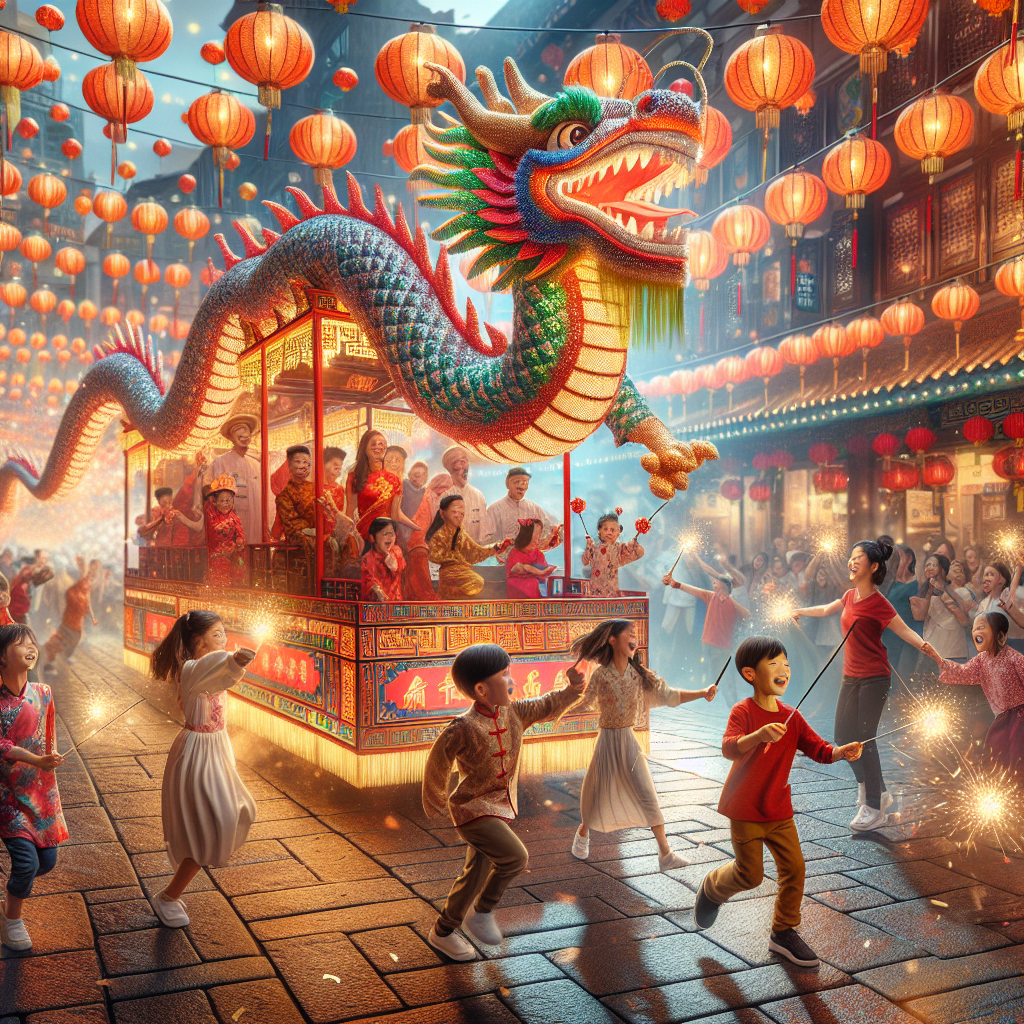

In [18]:

image